<a href="https://colab.research.google.com/github/vgayathri13/VRSU/blob/main/vrsu_program_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of images: 1797
Total number of labels: 1797


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3647 - loss: 2.1427 - val_accuracy: 0.8028 - val_loss: 1.4399
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8137 - loss: 1.1856 - val_accuracy: 0.8889 - val_loss: 0.5736
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9109 - loss: 0.4882 - val_accuracy: 0.9139 - val_loss: 0.3393
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9210 - loss: 0.3215 - val_accuracy: 0.9389 - val_loss: 0.2470
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9428 - loss: 0.2345 - val_accuracy: 0.9444 - val_loss: 0.1971
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9537 - loss: 0.1973 - val_accuracy: 0.9611 - val_loss: 0.1616
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9663 - loss: 0.1489 - val_accuracy: 0.9611 - val_loss: 0.1549
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9581 - loss: 0.1596 - val_accuracy: 0.9583 - val_lo

Saving bird.jpg.png to bird.jpg.png


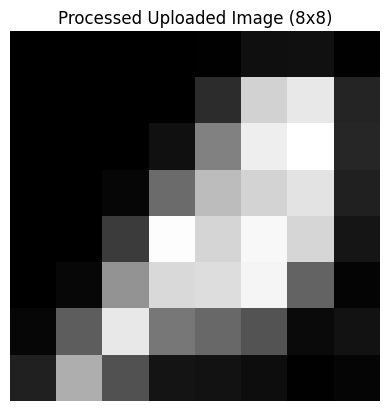

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Digit: 7


In [ ]:
# CNN based Object recognition (Digit Classification)

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from google.colab import files
from skimage.transform import resize

# Load dataset
digits = load_digits()
X = digits.images
y = digits.target

print("Total number of images:", X.shape[0])
print("Total number of labels:", y.shape[0])

# Normalize and reshape for CNN
X = X / 16.0
X = X.reshape(-1, 8, 8, 1)

y = to_categorical(y, 10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Model Accuracy:", accuracy)

# Upload image
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

# Convert to grayscale
if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Resize to 8x8
img_resized = resize(img_gray, (8, 8), anti_aliasing=True)

# Normalize & invert
img_resized = img_resized / img_resized.max()
img_resized = 1 - img_resized

plt.imshow(img_resized, cmap='gray')
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

# Prepare for prediction
img_resized = img_resized.reshape(1, 8, 8, 1)

prediction = model.predict(img_resized)
print("Predicted Digit:", np.argmax(prediction))